# Portfolio Project: Online Retail Exploratory Data Analysis with Python

## Overview

In this project, you will step into the shoes of an entry-level data analyst at an online retail company, helping interpret real-world data to help make a key business decision.

## Case Study
In this project, you will be working with transactional data from an online retail store. The dataset contains information about customer purchases, including product details, quantities, prices, and timestamps. Your task is to explore and analyze this dataset to gain insights into the store's sales trends, customer behavior, and popular products. 

By conducting exploratory data analysis, you will identify patterns, outliers, and correlations in the data, allowing you to make data-driven decisions and recommendations to optimize the store's operations and improve customer satisfaction. Through visualizations and statistical analysis, you will uncover key trends, such as the busiest sales months, best-selling products, and the store's most valuable customers. Ultimately, this project aims to provide actionable insights that can drive strategic business decisions and enhance the store's overall performance in the competitive online retail market.

## Project Objectives
1. Describe data to answer key questions to uncover insights
2. Gain valuable insights that will help improve online retail performance
3. Provide analytic insights and data-driven recommendations

## Dataset

The dataset you will be working with is the "Online Retail" dataset. It contains transactional data of an online retail store from 2010 to 2011. The dataset is available as a .xlsx file named `Online Retail.xlsx`. This data file is already included in the Coursera Jupyter Notebook environment, however if you are working off-platform it can also be downloaded [here](https://archive.ics.uci.edu/ml/machine-learning-databases/00352/Online%20Retail.xlsx).

The dataset contains the following columns:

- InvoiceNo: Invoice number of the transaction
- StockCode: Unique code of the product
- Description: Description of the product
- Quantity: Quantity of the product in the transaction
- InvoiceDate: Date and time of the transaction
- UnitPrice: Unit price of the product
- CustomerID: Unique identifier of the customer
- Country: Country where the transaction occurred

## Tasks

You may explore this dataset in any way you would like - however if you'd like some help getting started, here are a few ideas:

1. Load the dataset into a Pandas DataFrame and display the first few rows to get an overview of the data.
2. Perform data cleaning by handling missing values, if any, and removing any redundant or unnecessary columns.
3. Explore the basic statistics of the dataset, including measures of central tendency and dispersion.
4. Perform data visualization to gain insights into the dataset. Generate appropriate plots, such as histograms, scatter plots, or bar plots, to visualize different aspects of the data.
5. Analyze the sales trends over time. Identify the busiest months and days of the week in terms of sales.
6. Explore the top-selling products and countries based on the quantity sold.
7. Identify any outliers or anomalies in the dataset and discuss their potential impact on the analysis.
8. Draw conclusions and summarize your findings from the exploratory data analysis.

## Task 1: Load the Data

In [1]:
# your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

df = pd.read_excel(r"C:\Users\sara7\Downloads\My_Files\My projects\Coursera Python project\Online Retail.xlsx")

In [2]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df.shape[0]

541909

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
(df.isnull().sum()/df.shape[0])*100

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

In [6]:
df.dropna(inplace=True)

Basic Statistics including measures of central tendency and dispersion

Central tendency(mean, median, mode)

In [7]:
print("\nMean:\n", df.mean(numeric_only=True))
print("\nMedian:\n", df.median(numeric_only=True))  
print("\nMode:\n", df.mode().iloc[0])


Mean:
 Quantity         12.061303
UnitPrice         3.460471
CustomerID    15287.690570
dtype: float64

Median:
 Quantity          5.00
UnitPrice         1.95
CustomerID    15152.00
dtype: float64

Mode:
 InvoiceNo                                  576339
StockCode                                  85123A
Description    WHITE HANGING HEART T-LIGHT HOLDER
Quantity                                        1
InvoiceDate                   2011-11-14 15:27:00
UnitPrice                                    1.25
CustomerID                                17841.0
Country                            United Kingdom
Name: 0, dtype: object


Dispersion (Variance, std deviation,range ,IQR)

In [8]:
print("\nVariance:\n", df.var(numeric_only=True))
print("\nstandard Deviation:\n", df.std(numeric_only=True))
print("\nMinimum Values:\n", df.min(numeric_only=True))
print("\nMaximum Values:\n", df.max(numeric_only=True))
print("\nRange:\n", df.max(numeric_only=True)-df.min(numeric_only=True))


Variance:
 Quantity      6.184839e+04
UnitPrice     4.804592e+03
CustomerID    2.936426e+06
dtype: float64

standard Deviation:
 Quantity       248.693370
UnitPrice       69.315162
CustomerID    1713.600303
dtype: float64

Minimum Values:
 Quantity     -80995.0
UnitPrice         0.0
CustomerID    12346.0
dtype: float64

Maximum Values:
 Quantity      80995.0
UnitPrice     38970.0
CustomerID    18287.0
dtype: float64

Range:
 Quantity      161990.0
UnitPrice      38970.0
CustomerID      5941.0
dtype: float64


Interquartile Range (IQR)

In [9]:
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q1-Q3
print("\nInterquartile Range (IQR) :\n",IQR)


Interquartile Range (IQR) :
 Quantity       -10.0
UnitPrice       -2.5
CustomerID   -2838.0
dtype: float64


Summary stats (combo of central tendency and dispersion)

In [10]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,406829.000000,406829,406829.000000,406829.000000
mean,12.061303,2011-07-10 16:30:57.879207424,3.460471,15287.690570
min,-80995.000000,2010-12-01 08:26:00,0.000000,12346.000000
25%,2.000000,2011-04-06 15:02:00,1.250000,13953.000000
50%,5.000000,2011-07-31 11:48:00,1.950000,15152.000000
75%,12.000000,2011-10-20 13:06:00,3.750000,16791.000000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000
std,248.693370,NaN,69.315162,1713.600303


Visualization

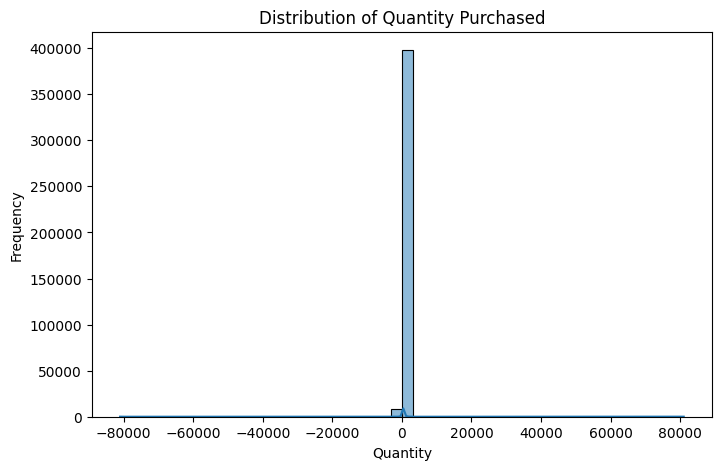

In [11]:
 # Distribution of Quantity

plt.figure(figsize=(8,5))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title("Distribution of Quantity Purchased")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()

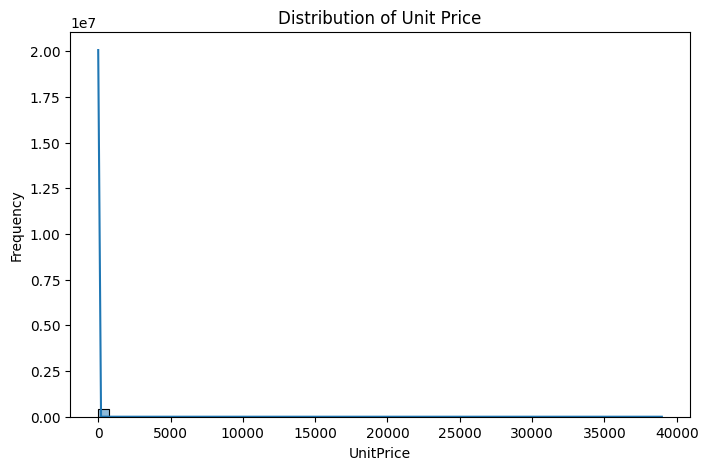

In [12]:
# Distribution of Unit Price

plt.figure(figsize=(8,5))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title("Distribution of Unit Price")
plt.xlabel("UnitPrice")
plt.ylabel("Frequency")
plt.show()

C:\Users\sara7\AppData\Local\Temp\ipykernel_11132\3861427003.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values,y=top_countries.index, palette="viridis")


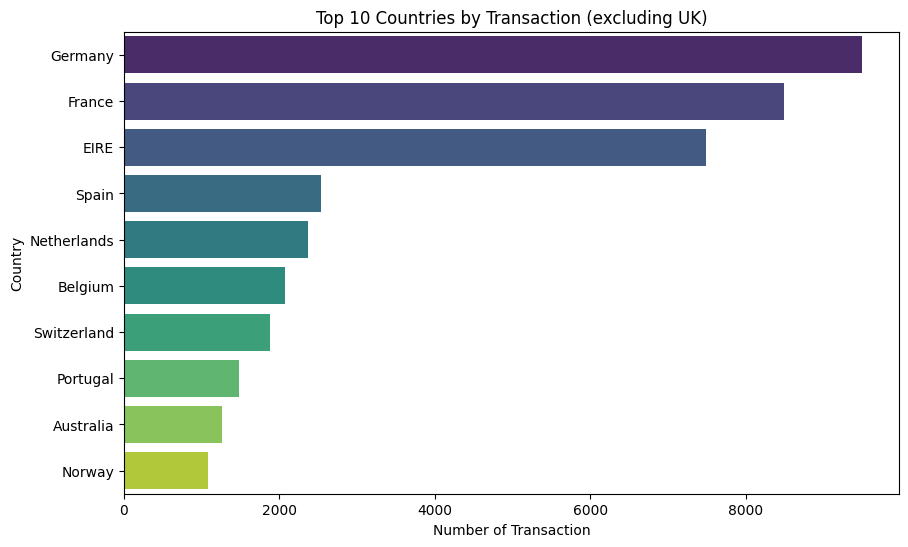

In [13]:
# Top 10 Countries (excluding UK)

top_countries = df[df['Country']!= "United Kingdom"]['Country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_countries.values,y=top_countries.index, palette="viridis")
plt.title("Top 10 Countries by Transaction (excluding UK)")
plt.xlabel("Number of Transaction")
plt.ylabel("Country")
plt.show()

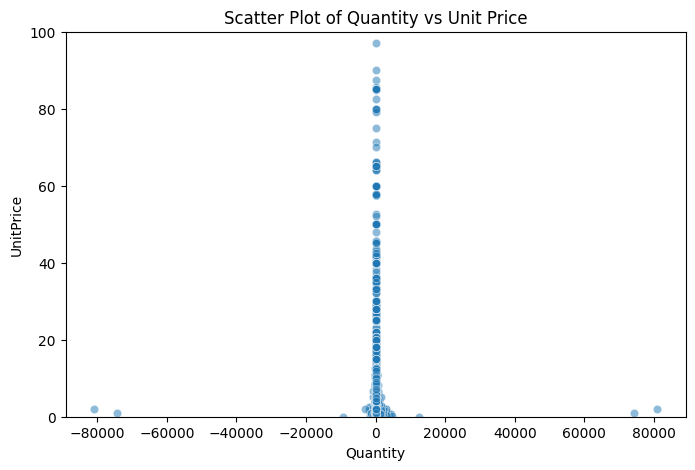

In [14]:
# Scatter Plot:- Quantity vs Unit Price

plt.figure(figsize=(8,5))
sns.scatterplot(x='Quantity',y='UnitPrice', data = df, alpha=0.5)
plt.title("Scatter Plot of Quantity vs Unit Price")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.ylim(0,100)    # Limit Y to remove extreme outliers.
plt.show()

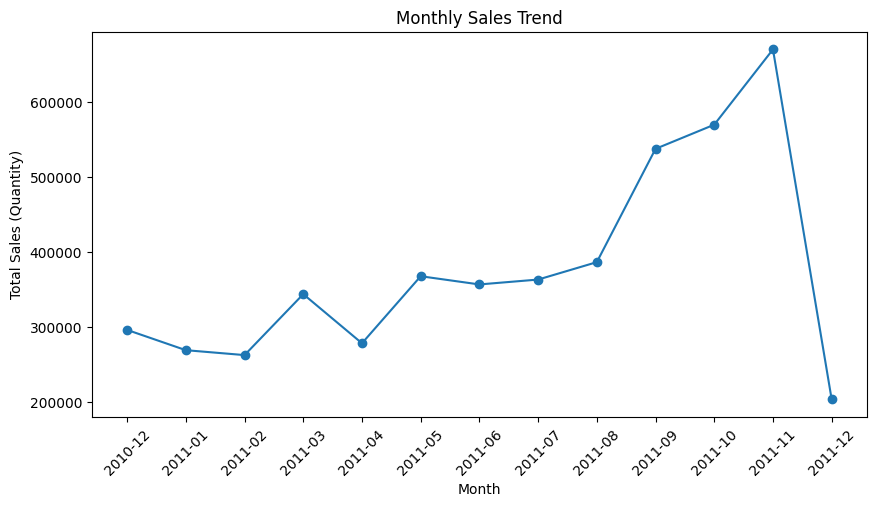

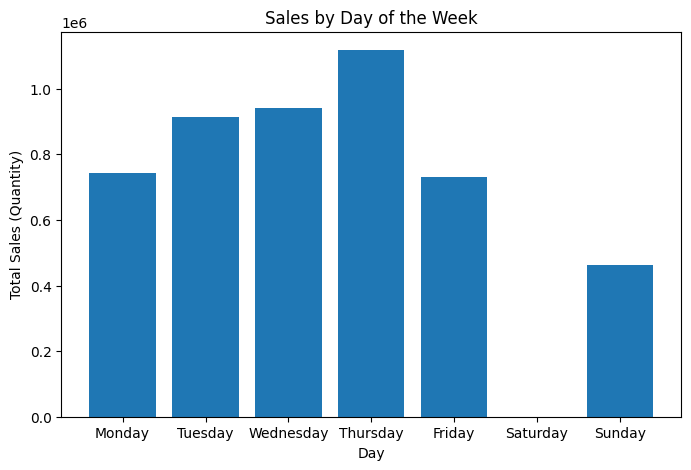

📅 Busiest Month: 2011-11 with 669915 sales
📅 Busiest Day of Week: Thursday with 1117882.0 sales


In [15]:

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create Month and DayOfWeek columns
df['Month'] = df['InvoiceDate'].dt.to_period('M')
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()

# Add Sales column (Quantity only, since UnitPrice not given)
# If UnitPrice exists, replace with df['Quantity'] * df['UnitPrice']
df['Sales'] = df['Quantity']

# ---- Sales Trend by Month ----
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

plt.figure(figsize=(10,5))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (Quantity)")
plt.xticks(rotation=45)
plt.show()

# ---- Busiest Day of the Week ----
weekday_sales = df.groupby('DayOfWeek')['Sales'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).reset_index()

plt.figure(figsize=(8,5))
plt.bar(weekday_sales['DayOfWeek'], weekday_sales['Sales'])
plt.title("Sales by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Total Sales (Quantity)")
plt.show()

# ---- Identifying Top Months & Days ----
busiest_month = monthly_sales.loc[monthly_sales['Sales'].idxmax()]
busiest_day = weekday_sales.loc[weekday_sales['Sales'].idxmax()]

print("📅 Busiest Month:", busiest_month['Month'], "with", busiest_month['Sales'], "sales")
print("📅 Busiest Day of Week:", busiest_day['DayOfWeek'], "with", busiest_day['Sales'], "sales")


Top Selling Products:
 Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     53215
JUMBO BAG RED RETROSPOT               45066
ASSORTED COLOUR BIRD ORNAMENT         35314
WHITE HANGING HEART T-LIGHT HOLDER    34147
PACK OF 72 RETROSPOT CAKE CASES       33409
POPCORN HOLDER                        30504
RABBIT NIGHT LIGHT                    27094
MINI PAINT SET VINTAGE                25880
PACK OF 12 LONDON TISSUES             25321
PACK OF 60 PINK PAISLEY CAKE CASES    24163
Name: Quantity, dtype: int64

Top Countries by Quantity:
 Country
United Kingdom    4008533
Netherlands        200128
EIRE               136329
Germany            117448
France             109848
Australia           83653
Sweden              35637
Switzerland         29778
Spain               26824
Japan               25218
Name: Quantity, dtype: int64


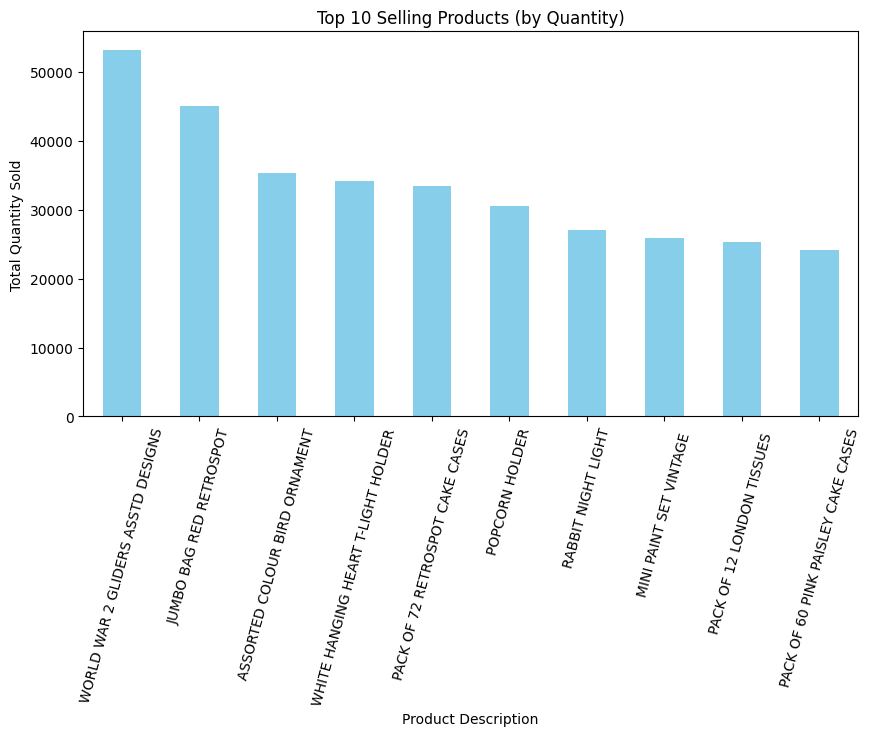

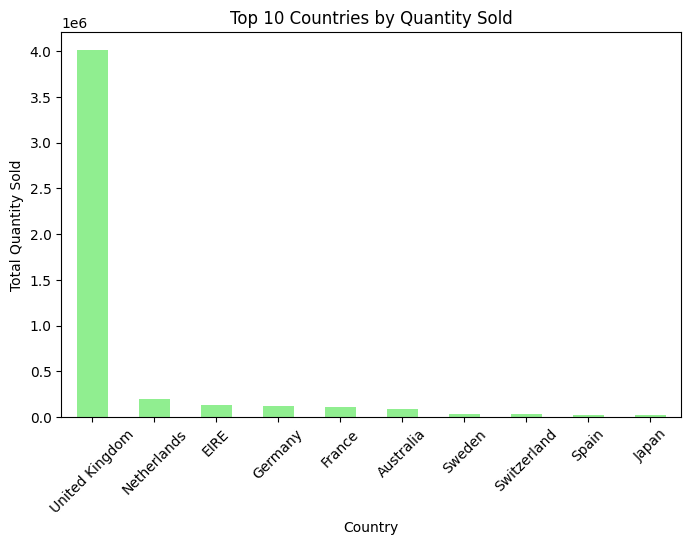

In [16]:
# Make sure data types are correct
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')

# Remove rows with missing values in important columns
df = df.dropna(subset=['CustomerID', 'InvoiceNo', 'StockCode', 'Description', 'Country', 'Quantity'])

# 🔹 Top-selling products
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top Selling Products:\n", top_products)

# 🔹 Top countries by quantity
top_countries = df.groupby('Country')['Quantity'].sum().sort_values(ascending=False).head(10)
print("\nTop Countries by Quantity:\n", top_countries)

# 📊 Visualization - Top Products
plt.figure(figsize=(10,5))
top_products.plot(kind='bar', color='skyblue')
plt.title("Top 10 Selling Products (by Quantity)")
plt.xlabel("Product Description")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=75)
plt.show()

# 📊 Visualization - Top Countries
plt.figure(figsize=(8,5))
top_countries.plot(kind='bar', color='lightgreen')
plt.title("Top 10 Countries by Quantity Sold")
plt.xlabel("Country")
plt.ylabel("Total Quantity Sold")
plt.xticks(rotation=45)
plt.show()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month        406829 non-null  period[M]     
 9   DayOfWeek    406829 non-null  object        
 10  Sales        406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), period[M](1)
memory usage: 37.2+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  406829.000000                         406829  406829.000000   
mea

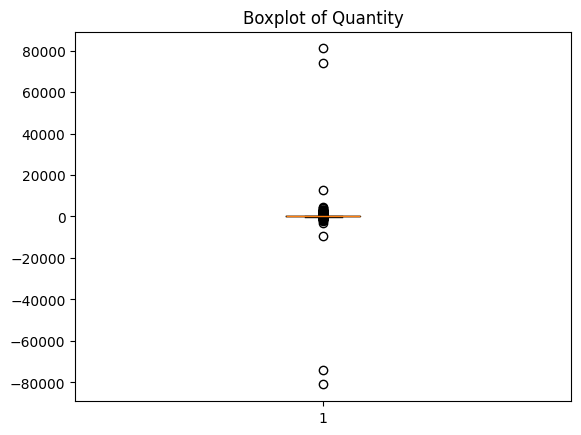

Outliers in Quantity:
         CustomerID InvoiceNo StockCode  Quantity
9          13047.0    536367     84879        32
31         12583.0    536370     10002        48
44         12583.0    536370     22492        36
46         13748.0    536371     22086        80
65         15100.0    536374     21258        32
...            ...       ...       ...       ...
541835     17581.0    581579     23581        40
541865     13777.0    581583     20725        40
541866     13777.0    581583     85038        36
541867     13777.0    581584     20832        72
541868     13777.0    581584     85038        48

[26682 rows x 4 columns]
Negative Quantity Transactions:
         CustomerID InvoiceNo  Quantity
141        14527.0   C536379        -1
154        15311.0   C536383        -1
235        17548.0   C536391       -12
236        17548.0   C536391       -24
237        17548.0   C536391       -24
...            ...       ...       ...
540449     14397.0   C581490       -11
541541     15498.0

In [17]:
# --- Basic checks ---
print(df.info())
print(df.describe())

# --- 1. Check for missing values ---
print(df.isnull().sum())

# --- 2. Outliers in Quantity ---
plt.boxplot(df['Quantity'])
plt.title("Boxplot of Quantity")
plt.show()

# Identify extreme values in Quantity
q1 = df['Quantity'].quantile(0.25)
q3 = df['Quantity'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = df[(df['Quantity'] < lower_bound) | (df['Quantity'] > upper_bound)]
print("Outliers in Quantity:\n", outliers[['CustomerID','InvoiceNo','StockCode','Quantity']])

# --- 3. Check negative quantities (usually returns/cancellations) ---
neg_qty = df[df['Quantity'] < 0]
print("Negative Quantity Transactions:\n", neg_qty[['CustomerID','InvoiceNo','Quantity']])

# --- 4. Check unusual invoice numbers (cancelled orders may start with 'C') ---
cancelled = df[df['InvoiceNo'].astype(str).str.startswith('C')]
print("Cancelled Invoices:\n", cancelled[['InvoiceNo','Quantity','CustomerID']])

# --- 5. Country anomalies (very few transactions from unexpected countries) ---
country_counts = df['Country'].value_counts()
rare_countries = country_counts[country_counts < 50]  # threshold can be adjusted
print("Rare Country Transactions:\n", df[df['Country'].isin(rare_countries.index)])


In [18]:
# --- Quick checks ---
print(df.info())
print(df.describe(include="all"))

# --- Missing values ---
print(df.isnull().sum())

# --- Unique counts ---
print("Unique Customers:", df["CustomerID"].nunique())
print("Unique Products:", df["StockCode"].nunique())
print("Unique Countries:", df["Country"].nunique())

# --- Basic insights ---
top_products = df["Description"].value_counts().head(10)
top_countries = df["Country"].value_counts().head(10)
top_customers = df["CustomerID"].value_counts().head(10)

# --- Time-based analysis ---
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])
sales_trend = df.groupby(df["InvoiceDate"].dt.date)["Quantity"].sum()


<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   Month        406829 non-null  period[M]     
 9   DayOfWeek    406829 non-null  object        
 10  Sales        406829 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), period[M](1)
memory usage: 37.2+ MB
None
        InvoiceNo StockCode                         Description  \
count    406829.0    406829                              406829   
unique   